# **Predictive Analysis: Churn Customer Prediction**


**Writter:** *Anak Agung Gde Pradnyana | odeypradnyana21@gmail.com*

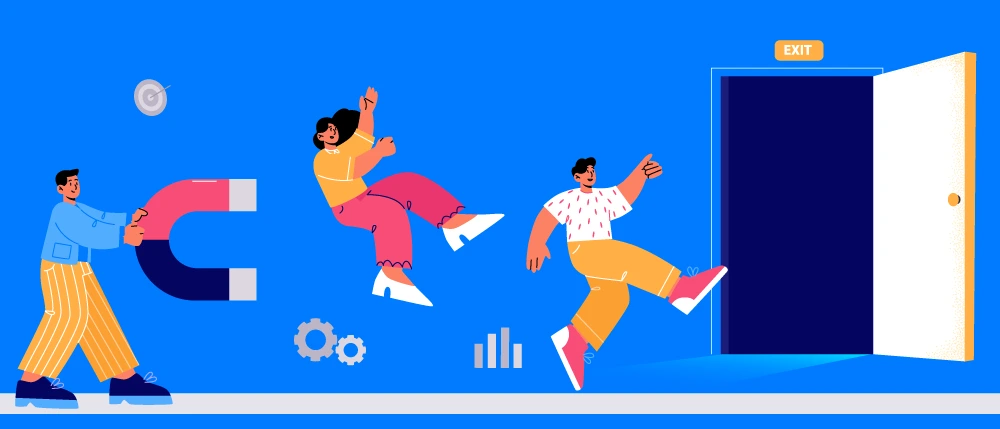

## **Import Important Library**

In [ ]:
# Library Untuk pengolahan data
from google.colab import files
import numpy as np
import pandas as pd
! pip install -q kaggle

# Library Untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library untuk Modelling
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## **Prepare Dataset**

In [ ]:
# Upload file json kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gungdepradnyana","key":"67f0da1553e10103d78a438ec1aeac12"}'}

In [ ]:
# Membuat folder .kaggle di dalam folder root
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke folder .kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download Dataset
!kaggle datasets download muhammadshahidazeem/customer-churn-dataset

Dataset URL: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
License(s): GPL-2.0
 75% 5.00M/6.66M [00:00<00:00, 38.8MB/s]
100% 6.66M/6.66M [00:00<00:00, 48.5MB/s]


In [ ]:
# Mengekstrak berkas zip ke direktori aktif saat ini
!unzip customer-churn-dataset.zip

Archive:  customer-churn-dataset.zip
  inflating: customer_churn_dataset-testing-master.csv  
  inflating: customer_churn_dataset-training-master.csv  


## **Data Understanding**

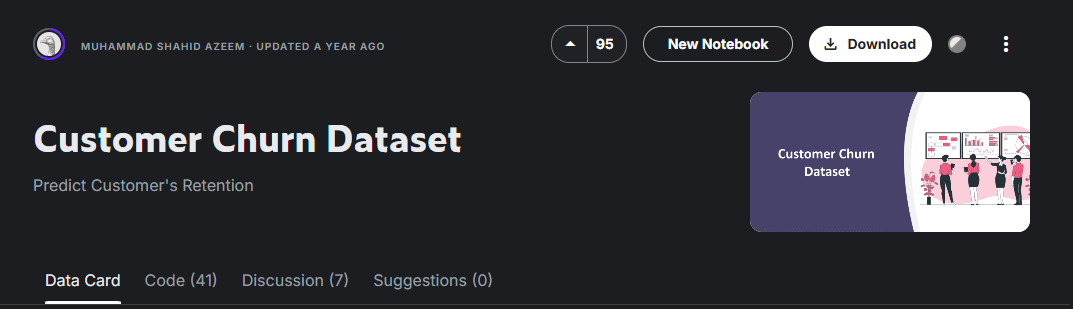

Jenis | Keterangan
--- | ---
Sumber | [Kaggle Dataset : Churn Customer Prediction Dataset](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset)
Lisensi | Data files © GPL 2
Kategori | Ekonomi, Bisnis, Classification
Jenis dan Ukuran Berkas | CSV (7 Mb)
Konsdisi Dataset | Terdapat missing value dan tidak ada data duplicate

In [ ]:
# Memuat Dataset
df= pd.read_csv("/content/customer_churn_dataset-training-master.csv")

In [ ]:
# Menampilkan 5 data ter-atas
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
# Cek Detail Fitur dan tipe data pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


Pada berkas yang diunduh yakni customer churn_dataset-training-master.csv berisi 440.833 baris dan 12 kolom. Kolom-kolom tersebut terdiri dari 3 buah kolom bertipe objek dan 9 buah kolom bertipe desimal (tipe data float). Untuk penjelasan mengenai variabel-variable pada dataset stroke ini dapat dilihat sebagai berikut:
* **CustomerID:** Identifikasi unik untuk setiap pelanggan dalam dataset. Fitur ini digunakan untuk membedakan setiap pelanggan dan menghindari duplikasi data.
* **Age:** Usia pelanggan dalam tahun. Fitur ini memberikan informasi tentang demografi pelanggan berdasarkan usia.      
* **Gender:**  Jenis kelamin pelanggan. Fitur ini mengklasifikasikan pelanggan berdasarkan gender, biasanya dengan nilai seperti 'Laki-laki' atau 'Perempuan'.
* **Tenure:** Lama waktu (biasanya dalam bulan atau tahun) sejak pelanggan pertama kali mulai menggunakan layanan. Fitur ini mencerminkan loyalitas dan pengalaman pelanggan dengan layanan.        
* **Usage Frequency:**  Frekuensi penggunaan layanan oleh pelanggan, biasanya dalam hitungan harian, mingguan, atau bulanan. Fitur ini memberikan gambaran seberapa sering pelanggan menggunakan layanan.  
* **Support Calls:** Jumlah panggilan yang dilakukan customer ke layanan dukungan selama periode tertentu. Fitur ini mengindikasikan kebutuhan atau masalah yang dialami customer saat menggunakan layanan.
* **Payment Delay:** Indikator apakah customer mengalami keterlambatan dalam pembayaran, sering kali diukur dalam hari keterlambatan atau jumlah kali keterlambatan. Fitur ini dapat menunjukkan potensi risiko finansial atau perilaku pembayaran customer.
* **Subscription Type:** Tipe langganan yang diambil oleh pelanggan, seperti paket standard, premium, dan basic. Fitur ini menggambarkan pilihan layanan yang diambil oleh customer dan nilai yang mereka bayarkan.
* **Contract Length:** Panjang kontrak yang telah disepakati oleh customer seperti _annual_,_monthly_,_quarterly_. Fitur ini mencerminkan komitmen jangka panjang customer terhadap layanan.
* **Total Spend:** Total pengeluaran yang dilakukan oleh customer selama periode tertentu. Fitur ini mencakup semua pembayaran yang telah dilakukan dan memberikan gambaran tentang nilai finansial dari setiap customer.
* **Last Interaction:** Waktu atau tanggal terakhir kali customer berinteraksi dengan layanan atau melakukan kontak dengan perusahaan. Fitur ini berguna untuk mengukur keterlibatan terkini customer.
* **Churn:** Indikator apakah customer telah berhenti berlangganan layanan atau tidak, dengan nilai 0 untuk tidak churn dan 1 untuk churn.

## **Cleaning Data**

In [ ]:
# Periksa nilai null
null_values = df.isnull().sum()
print(null_values)

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


Dapat dilihat hasil checking nilai Null pada dataset, semua fitur memiliki 1 Nilai Null sehingga kemungkinan Nilai Null terdapat pada salah satu baris.

In [ ]:
# Removing the single missing value row
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


Hasil dari hapus nilai Null menggunakan code di bawah, baris yang memiliki nilai Null sudah hilang

```
# df.dropna(inplace=True)
```



In [ ]:
# Periksa duplikat
duplicate_rows = df[df.duplicated()]
print( duplicate_rows)

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []


Dilihat dari hasil output code di atas tidak terdapat nilai duplicate yang menganggu pemodelan jika dibiarkan.

In [ ]:
# Hapus kolom CustomerID
df = df.drop('CustomerID', axis=1)

Menghapus kolom CustomerID karena tidak relevan saat tahap EDA maupun pemodelan nantinya. Overall semua tahapan pada data cleaninng berguna untuk memastikan kualitas data yang digunakan, sehingga dapat menghasilkan analisis dan model yang akurat dan dapat diandalkan.

## **EDA (Exploratory Data Analysis)**

In [ ]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


**Analisis:**
- Mayoritas pelanggan berada di usia kerja produktif (sekitar 39 tahun).
- Rentang usia yang luas menunjukkan adanya pelanggan dari berbagai generasi, yang dapat memberikan wawasan tentang perilaku churn di berbagai kelompok usia.
- Banyak pelanggan yang sudah berlangganan dalam waktu lama.
- Adanya pelanggan baru (tenure mendekati 1 bulan) yang perlu mendapat perhatian lebih untuk mengurangi churn.
- Frekuensi rata-rata yang cukup tinggi menunjukkan pelanggan cukup aktif menggunakan layanan.
- Pelanggan dengan frekuensi penggunaan rendah (1 kali) mungkin cenderung churn.
- Sebagian besar pelanggan hanya menelepon dukungan 1-2 kali, yang mungkin menunjukkan pelayanan yang efisien.
- Pelanggan dengan jumlah panggilan tinggi (>10) kemungkinan mengalami masalah yang memengaruhi kepuasan mereka.
- Rata-rata penundaan pembayaran menunjukkan beberapa pelanggan terlambat membayar hampir dua minggu.
- Penundaan pembayaran yang tinggi dapat menjadi indikator pelanggan berisiko churn.

In [ ]:
# Dapatkan nilai unik pada kolom age
unique_ages = df['Age'].unique()
print(unique_ages)

[30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]


<ipython-input-16-852d579a2448>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_churn = df.groupby(['Age Group', 'Churn']).size().unstack()


<Figure size 1000x600 with 0 Axes>

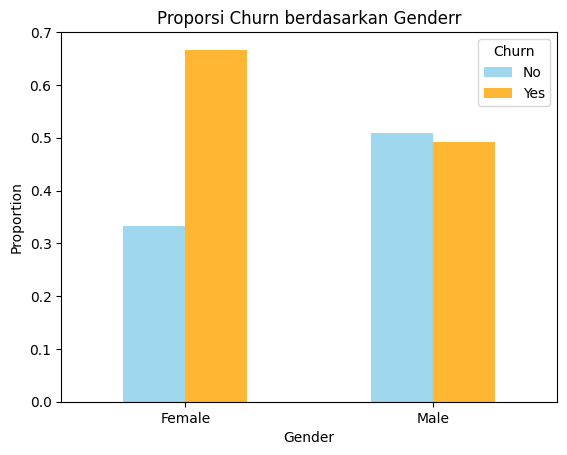

In [ ]:
# Gender vs Churn
gender_churn = df.groupby(['Gender', 'Churn']).size().unstack()
gender_churn_ratio = (gender_churn.T / gender_churn.T.sum()).T

# Rata-rata Age berdasarkan Churn
age_churn = df.groupby('Churn')['Age'].mean()

# Distribusi Age berdasarkan Churn
age_bins = [0, 20, 30, 40, 50, 60, 70]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins)
age_group_churn = df.groupby(['Age Group', 'Churn']).size().unstack()

# Plot 1: Proporsi Gender vs Churn
plt.figure(figsize=(10, 6))
gender_churn_ratio.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], alpha=0.8)
plt.title('Proporsi Churn berdasarkan Genderr')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

## **Analisis:**


**Proportion of Churn by Gender**

- Pelanggan pria dan wanita memiliki tingkat churn yang mirip. Kedua kelompok menunjukkan proporsi churn yang signifikan.
- Tidak ada perbedaan mencolok antara gender terkait dengan churn. Ini menunjukkan bahwa gender mungkin bukan faktor yang menentukan dalam perilaku churn.
- Fokus pada faktor lain seperti penggunaan layanan atau interaksi terakhir pelanggan karena gender tidak menjadi prediktor utama churn.

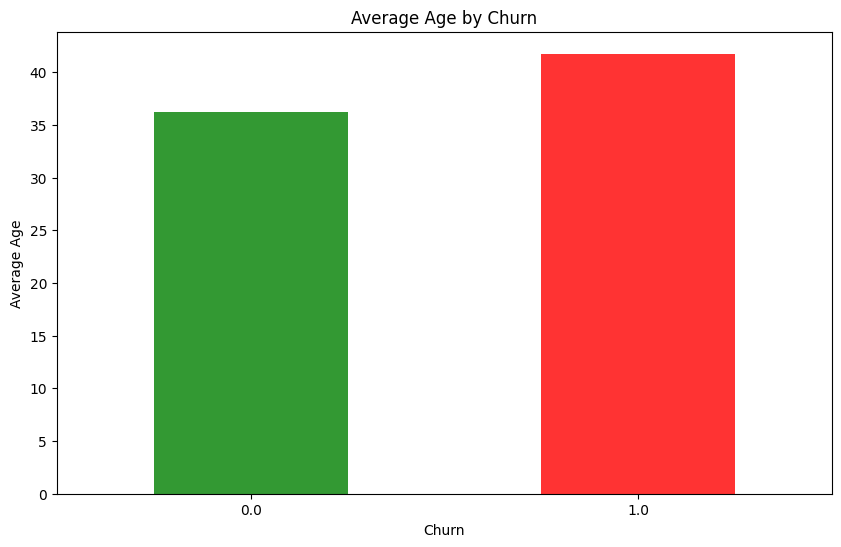

In [ ]:
# Plot 2: Average Age by Churn
plt.figure(figsize=(10, 6))
age_churn.plot(kind='bar', color=['green', 'red'], alpha=0.8)
plt.title('Average Age by Churn')
plt.ylabel('Average Age')
plt.xlabel('Churn')
plt.xticks(rotation=0)
plt.show()

## **Analisis:**



**Average Age by Churn**
- Pelanggan yang Churn (Bar Merah): Memiliki rata-rata usia yang lebih tinggi (sekitar 40 tahun). Hal ini menunjukkan bahwa pelanggan dengan usia yang lebih tua cenderung lebih mungkin untuk churn dibandingkan pelanggan dengan usia yang lebih muda.
Pelanggan yang Tidak Churn (Bar Hijau): Memiliki rata-rata usia yang lebih rendah (sekitar 35 tahun). Pelanggan yang tidak churn cenderung berasal dari kelompok usia yang lebih muda.

<Figure size 1000x600 with 0 Axes>

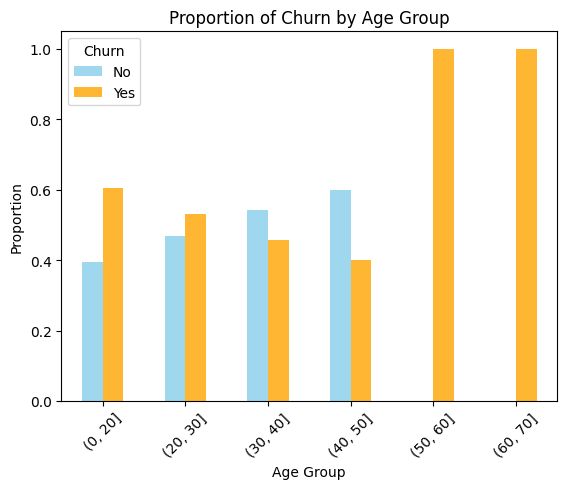

In [ ]:
# Plot 3: Age Group Distribution by Churn
plt.figure(figsize=(10, 6))
age_group_churn_ratio = (age_group_churn.T / age_group_churn.T.sum()).T
age_group_churn_ratio.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], alpha=0.8)
plt.title('Proportion of Churn by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

### **Analisis:**


**Proportion of Churn by Age Group**
- Kelompok Usia Muda (0-20 Tahun): Pelanggan muda memiliki proporsi churn lebih tinggi dibandingkan dengan pelanggan yang tidak churn.
Hal ini menunjukkan bahwa pelanggan dalam kelompok usia ini lebih rentan meninggalkan layanan.
- Kelompok Usia 20-50 Tahun: Kelompok usia ini memiliki distribusi churn yang lebih seimbang antara churn ("Yes") dan non-churn ("No"). Ini menunjukkan bahwa pelanggan di rentang usia ini cenderung memiliki perilaku churn yang tidak terlalu ekstrem, mungkin tergantung pada faktor lain seperti penggunaan layanan atau pengalaman pelanggan.
- Kelompok Usia Tua (50-70 Tahun): Hampir seluruh pelanggan di kelompok usia ini churn (proporsi bar oranye mendominasi). Ini menunjukkan bahwa pelanggan di kelompok usia ini memiliki kecenderungan yang sangat tinggi untuk churn.

<Figure size 800x600 with 0 Axes>

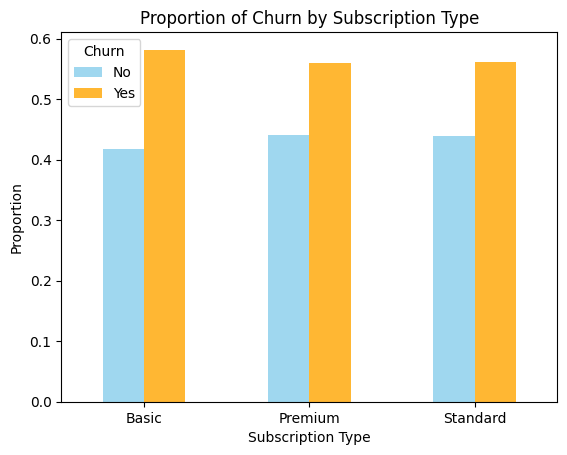

<Figure size 800x600 with 0 Axes>

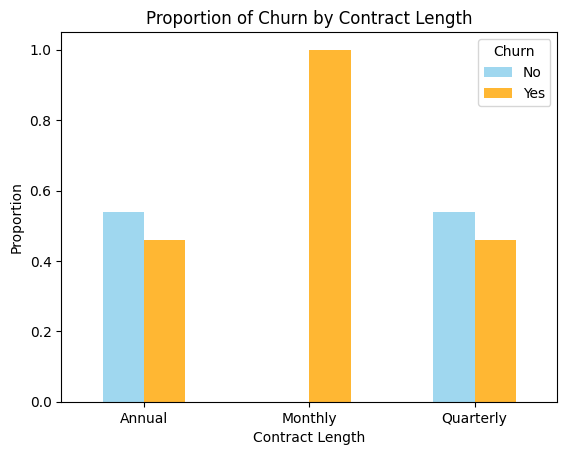

In [ ]:
# Distribution of Subscription Type and Contract Length vs Churn
subscription_churn = df.groupby(['Subscription Type', 'Churn']).size().unstack()
contract_churn = df.groupby(['Contract Length', 'Churn']).size().unstack()

# Plot Subscription Type vs Churn
plt.figure(figsize=(8, 6))
subscription_churn_ratio = (subscription_churn.T / subscription_churn.T.sum()).T
subscription_churn_ratio.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], alpha=0.8)
plt.title('Proportion of Churn by Subscription Type')
plt.ylabel('Proportion')
plt.xlabel('Subscription Type')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

# Plot Contract Length vs Churn
plt.figure(figsize=(8, 6))
contract_churn_ratio = (contract_churn.T / contract_churn.T.sum()).T
contract_churn_ratio.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], alpha=0.8)
plt.title('Proportion of Churn by Contract Length')
plt.ylabel('Proportion')
plt.xlabel('Contract Length')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

### **Analisis:**

**Proportion of Churn by Subscription Type**
- Semua jenis langganan (Basic, Premium, Standard) memiliki proporsi churn yang signifikan.
- Proporsi churn (warna oranye) terlihat hampir sama di antara ketiga jenis langganan.
Artinya, jenis langganan tidak memiliki perbedaan besar dalam menentukan tingkat churn.

**Proportion of Churn by Contract Length**
- Langganan tahunan (Annual) memiliki proporsi churn yang lebih rendah dibandingkan langganan bulanan (Monthly) dan kuartalan (Quarterly).
- Langganan bulanan dan kuartalan menunjukkan tingkat churn yang lebih tinggi, yang mungkin disebabkan oleh kurangnya keterikatan pelanggan pada kontrak jangka pendek.

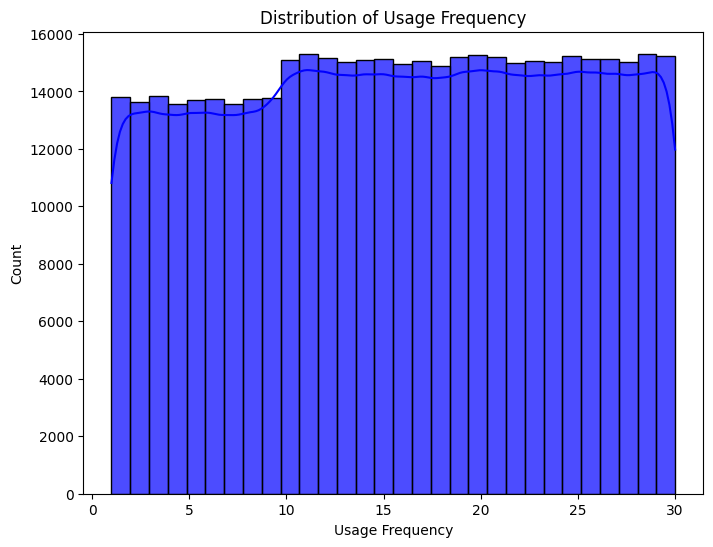

In [ ]:
# Visualizing Usage Frequency Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Usage Frequency'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Usage Frequency')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.show()

### **Analisis:**
- Distribusi frekuensi penggunaan layanan cukup merata, dengan mayoritas pelanggan memiliki penggunaan layanan yang konsisten.
- Pelanggan dengan frekuensi penggunaan yang lebih rendah mungkin berisiko churn jika dibandingkan dengan pelanggan dengan frekuensi tinggi (perlu analisis tambahan untuk memastikan).


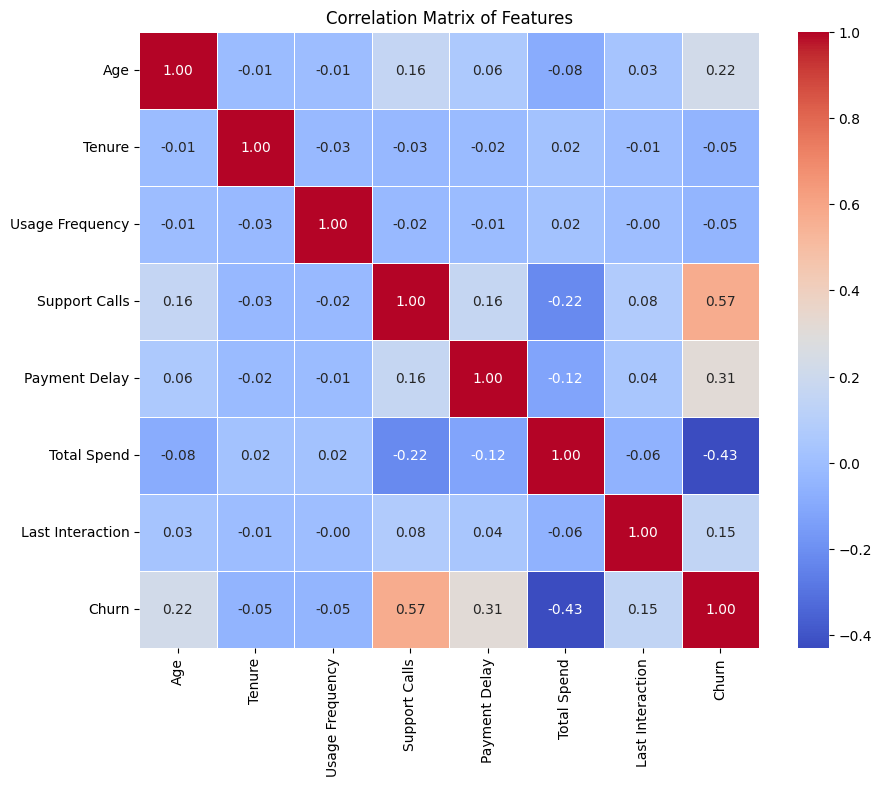

In [ ]:
# Select only numerical features before calculating correlation
numerical_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


**Faktor utama yang memengaruhi churn:**

- Jumlah Support Calls (positif kuat, 0.57).
- Payment Delay (positif sedang, 0.31).
- Total pengeluaran (Total Spend) (negatif sedang, -0.43).

**Faktor lemah atau tidak signifikan terhadap churn:**

- Usia (Age), masa keanggotaan (Tenure), frekuensi penggunaan (Usage Frequency), dan interaksi terakhir (Last Interaction).

## **Preprocessing**

In [ ]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Age Group
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,"(20, 30]"
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,"(60, 70]"
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,"(50, 60]"
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,"(50, 60]"
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,"(20, 30]"


In [ ]:
# Hapus kolom Age Group
df = df.drop('Age Group', axis=1)

In [ ]:
# Cek value kolom yang masih bertipe object
for column in df:
    if df[column].dtypes=='object':
        print(f'{column}: {df[column].unique()}')

Gender: ['Female' 'Male']
Subscription Type: ['Standard' 'Basic' 'Premium']
Contract Length: ['Annual' 'Monthly' 'Quarterly']


Output dari codingan di atas dapat dilihat bahwa terdapat 3 fitur yang masih memiliki tipe data object. Diantara lain Gender memiliki 2 value kategori, SubsType 3 value kategori, dan Contract Length 3 value kategori.

In [ ]:
onehotencoder = OneHotEncoder()

In [ ]:
# Mapping values for categorical columns
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
df['Subscription Type'] = pd.Categorical(df['Subscription Type'])
datasetDummies_Subs_Type = pd.get_dummies(df['Subscription Type'], prefix = 'Subscription_Type', dtype=int)
datasetDummies_Subs_Type

,Subscription_Type_Basic,Subscription_Type_Premium,Subscription_Type_Standard
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
440828,0,1,0
440829,0,1,0
440830,0,0,1
440831,0,0,1


In [ ]:
df['Contract Length'] = pd.Categorical(df['Contract Length'])
datasetDummies_Contract = pd.get_dummies(df['Contract Length'], prefix = 'Contract Length', dtype=int)
datasetDummies_Contract

,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
440828,1,0,0
440829,1,0,0
440830,0,0,1
440831,0,0,1


Untuk yang memiliki 2 value kategori digunakan fungsi mapping, selain itu digunakan fungsi OneHotEncoder agar merubah value object menjadi numerik sesuai kategori fitur masing-masing

In [ ]:
# Drop kolom Subscription Type dan Contract Length
df.drop("Subscription Type", axis=1, inplace=True)
df.drop("Contract Length", axis=1, inplace=True)


df = pd.concat([df, datasetDummies_Subs_Type], axis=1)
df = pd.concat([df, datasetDummies_Contract], axis=1)

Menghapus kolom Subscription Type dan Contract Length dan diganti dengan dataframe yang merupakan hasil fungsi OneHotEncoder menggunakan fungsi concate

In [ ]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription_Type_Basic,Subscription_Type_Premium,Subscription_Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0,0,1,1,0,0
1,65.0,0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,0,0,1,0
2,55.0,0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,0,0,0,1
3,58.0,1,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0,0,1,0,1,0
4,23.0,1,32.0,20.0,5.0,8.0,617.0,20.0,1.0,1,0,0,0,1,0


In [ ]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , shuffle=True, random_state=55)

Kode tersebut digunakan untuk membagi dataset menjadi dua bagian: training set dan testing set. Kode ini memastikan model dapat dilatih pada satu bagian data (training set) dan diuji pada bagian lain (testing set) untuk mengevaluasi kemampuannya dalam melakukan generalisasi pada data baru.

In [ ]:
# Mengecek jumlah baris pada data latih dan data
print(X_train.shape)
print(X_test.shape)

(352665, 14)
(88167, 14)


In [ ]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Modelling**

### **Random Forest**

In [ ]:
# 1. Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

### **KNN**

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_predictions = KNN.predict(X_test)

### **XGBoost**

In [ ]:
# 3. XGBoost Model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:17:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **Evaluate Models**

In [ ]:
# Ensure classification_report includes all classes
rf_report = classification_report(y_test, rf_predictions, labels=[0, 1], output_dict=True)
KNN_report = classification_report(y_test, KNN_predictions, labels=[0, 1], output_dict=True)
xgb_report = classification_report(y_test, xgb_predictions, labels=[0, 1], output_dict=True)

# Combine results into a DataFrame
results_df = pd.DataFrame({
    "Random Forest": [accuracy_score(y_test, rf_predictions), rf_report["1"]["precision"], rf_report["1"]["recall"], rf_report["1"]["f1-score"]],
    "KNN": [accuracy_score(y_test, KNN_predictions), KNN_report["1"]["precision"], KNN_report["1"]["recall"], KNN_report["1"]["f1-score"]],
    "XGBoost": [accuracy_score(y_test, xgb_predictions), xgb_report["1"]["precision"], xgb_report["1"]["recall"], xgb_report["1"]["f1-score"]]
}, index=["Accuracy", "Precision", "Recall", "F1-Score"])

print(results_df)


           Random Forest       KNN   XGBoost
Accuracy         0.99949  0.960677  0.999909
Precision        0.99998  0.998243  0.999960
Recall           0.99912  0.932267  0.999880
F1-Score         0.99955  0.964128  0.999920


### **Testing Model**

In [ ]:
from sklearn.metrics import confusion_matrix
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

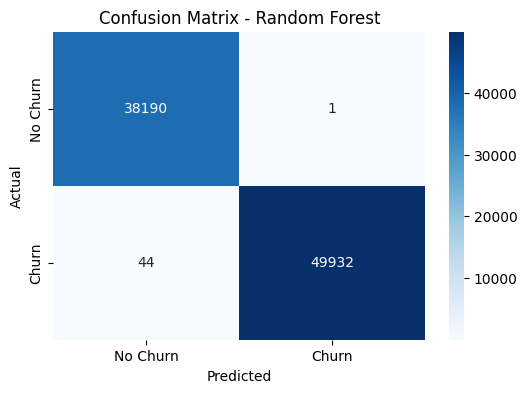

In [ ]:
# Confusion Matrices for all models
rf_cm = confusion_matrix(y_test, rf_predictions)
KNN_cm = confusion_matrix(y_test, KNN_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)

# Plot for each model
plot_confusion_matrix(rf_cm, "Random Forest")

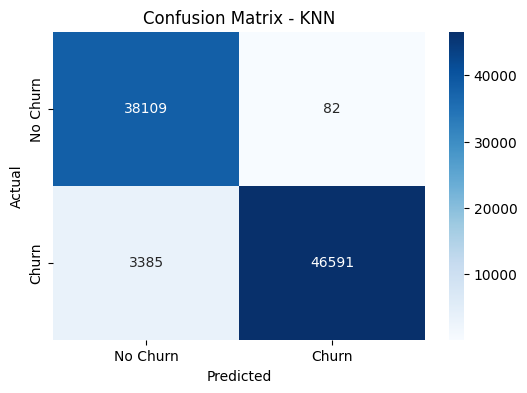

In [ ]:
plot_confusion_matrix(KNN_cm, "KNN")

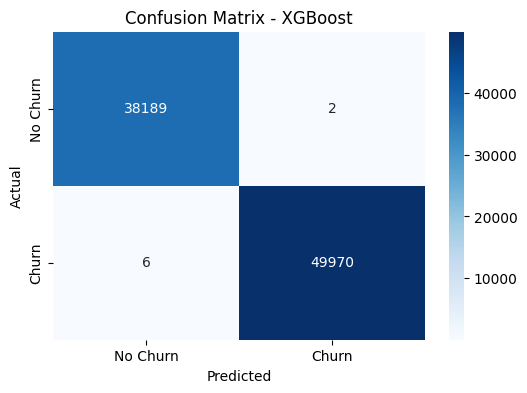

In [ ]:
plot_confusion_matrix(xgb_cm, "XGBoost")

## **Kesimpulan**


Dari hasil training ketiga model RF, KNN, dan XGBoost. Dapat dikatakan model XGBoost performance yang paling mumpuni dari RF dan KNN. Model tersebut mengungguli beberapa aspek dari KNN dan RF seperti accuracy, precision, recall, dan F1-Score di angka 0.99+. Selain itu ketika di tahap testing menggunakan confusion matrix model XGBoost paling banyak benar mempredict churn ataupun no churn. Sehingga Model ini sangat cocok untuk digunakan dalam skenario bisnis karena memiliki tingkat false positive dan false negative yang sangat rendah dan
hal ini penting untuk menjaga hubungan pelanggan (menghindari salah sasaran) sekaligus memprediksi dengan tepat pelanggan yang berpotensi churn.